In [133]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
import matplotlib.pyplot as plt

In [135]:
df = sns.load_dataset("titanic")

In [137]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [139]:
df[["sex", "class", "embark_town"]].isna().sum()

sex            0
class          0
embark_town    2
dtype: int64

In [141]:
df = df.dropna(subset=['embark_town'])

In [143]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [145]:
df[["sex", "class", "embark_town"]].isna().sum()

sex            0
class          0
embark_town    0
dtype: int64

In [147]:
df[["sex", "class", "embark_town"]].isna().sum()

sex            0
class          0
embark_town    0
dtype: int64

## One Hot Encoding

In [150]:
df["sex"].value_counts()

sex
male      577
female    312
Name: count, dtype: int64

In [152]:
df["embark_town"].value_counts()

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

In [154]:
df["class"].value_counts()

class
Third     491
First     214
Second    184
Name: count, dtype: int64

#### get_dummies()

In [157]:
df_onehot=pd.get_dummies(df, columns=["sex", "embark_town"],drop_first=True)

In [159]:
df_onehot #"sex", "embark_town" columns deleted

,survived,pclass,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,alive,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,3,22.0,1,0,7.2500,S,Third,man,True,NaN,no,False,True,False,True
1,1,1,38.0,1,0,71.2833,C,First,woman,False,C,yes,False,False,False,False
2,1,3,26.0,0,0,7.9250,S,Third,woman,False,NaN,yes,True,False,False,True
3,1,1,35.0,1,0,53.1000,S,First,woman,False,C,yes,False,False,False,True
4,0,3,35.0,0,0,8.0500,S,Third,man,True,NaN,no,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,S,Second,man,True,NaN,no,True,True,False,True
887,1,1,19.0,0,0,30.0000,S,First,woman,False,B,yes,True,False,False,True
888,0,3,NaN,1,2,23.4500,S,Third,woman,False,NaN,no,False,False,False,True
889,1,1,26.0,0,0,30.0000,C,First,man,True,C,yes,True,True,False,False


In [161]:
df_onehot.columns #'sex_male' (if male true(male), if false(female)), 'embark_town_Queenstown', 'embark_town_Southampton'(if both are false, the other('Cherbourg') is true.) columns added 

Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'embarked',
       'class', 'who', 'adult_male', 'deck', 'alive', 'alone', 'sex_male',
       'embark_town_Queenstown', 'embark_town_Southampton'],
      dtype='object')

## Label Encoding

In [170]:
label_encoder=LabelEncoder()

In [172]:
df_label=df.copy()

In [174]:
df_label

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [176]:
label_encoder.fit_transform(df_label["sex"])

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,

In [178]:
# df_label["sex_encoded"] -> if we want to add a new column
# df_label["sex"] -> or make changes to the relevant column 
df_label["sex"]= label_encoder.fit_transform(df_label["sex"])

In [180]:
df_label # sex: male, female -> 1,0

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,0,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,0,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,1,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,0,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,0,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,1,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


## Ordinal Encoding

In [208]:
df_ordinal= df.copy()

In [210]:
class_order=["Third", "Second", "First"]

In [212]:
ordinal_encoder = OrdinalEncoder(categories= [class_order])

In [216]:
df_ordinal["class"]=ordinal_encoder.fit_transform(df_ordinal[["class"]])

In [218]:
df_ordinal

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,0.0,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,2.0,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,0.0,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,2.0,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,0.0,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,1.0,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,2.0,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,0.0,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,2.0,man,True,C,Cherbourg,yes,True


In [220]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


<Axes: title={'center': 'Ordinal Encoded'}, xlabel='sex'>

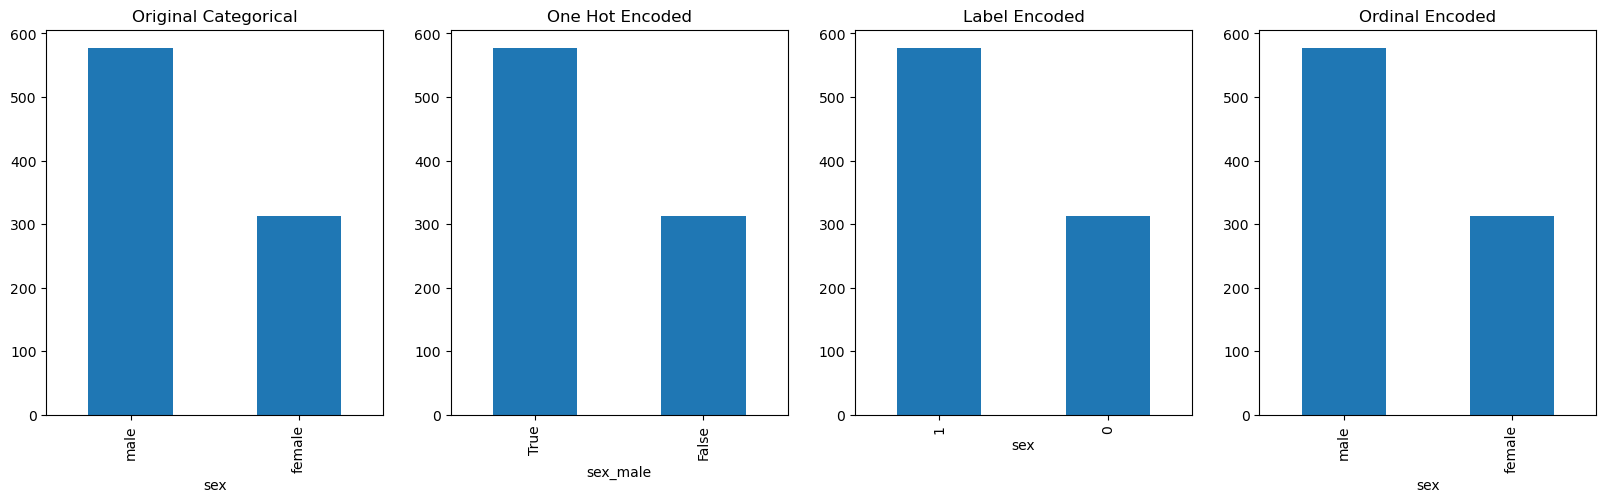

In [254]:
fig, axes=plt.subplots(1,4,figsize=(20,5))

df["sex"].value_counts().plot(kind="bar", ax=axes[0], title="Original Categorical")
df_onehot["sex_male"].value_counts().plot(kind="bar", ax=axes[1], title="One Hot Encoded")
df_label["sex"].value_counts().plot(kind="bar", ax=axes[2], title="Label Encoded")
df_ordinal["sex"].value_counts().plot(kind="bar", ax=axes[3], title="Ordinal Encoded")